In [233]:
# ## INTRODUCTION
# This analysis evaluates two sets of data

# 1. All data, regardless of County

# Various parameters are evaluated, such as injuries per acres burned, injuries per personnel 
# involved, etc.
# Various statistics are calculated for each parameter.

# 2. Data by County

# Similar parameters are evaluated to qualitatively observe variations among Counties.

# No statistical analysis is conducted because it would be meaningless, as it would require to 
# draw statistics (mean, etc) on all the Counties.

# An interesting evaluation, not conducted with the current dataset, would be to normalize the 
# parameters of interest by the acreage of each County


In [234]:
# 1. ESTABLISH DEPENDENCIES AND SET UP FILES

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time

import scipy.stats as st
from scipy.stats import linregress

In [235]:
# Output File (CSV)
pyre_data_path_ale = "Resources/California_Fire_Incidents.csv"

In [236]:
pyre1_df = pd.read_csv(pyre_data_path_ale)

In [237]:
# Select column headers for data frame
pyre1_df = pyre1_df[["UniqueId", "CountyIds","Counties", 
                         "AcresBurned", "Injuries","Fatalities", "Days Burned",
                         "AirTankers", "ArchiveYear", "Dozers", "Engines", "Helicopters",
                         "WaterTenders","CrewsInvolved","PersonnelInvolved", 
                         "StructuresDamaged", "StructuresDestroyed", "StructuresEvacuated",
                         "StructuresThreatened"]
                       ]                
pyre1_df.head(1)

,UniqueId,CountyIds,Counties,AcresBurned,Injuries,Fatalities,Days Burned,AirTankers,ArchiveYear,Dozers,Engines,Helicopters,WaterTenders,CrewsInvolved,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened
0,5fb18d4d-213f-4d83-a179-daaf11939e78,55,Tuolumne,257314.0,NaN,NaN,20,NaN,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
# Revise data frame to include fires > 10 acres only 

pyre1_df = pyre1_df.loc[pyre1_df["AcresBurned"]>10]

pyre1_df = pyre1_df.sort_values("AcresBurned", ascending = 0)

pyre1_df = pyre1_df.drop(["CountyIds", "Days Burned", "ArchiveYear"], axis = 1)

pyre1_df = pyre1_df.reset_index(drop=True)

pyre1_df.head(1)


,UniqueId,Counties,AcresBurned,Injuries,Fatalities,AirTankers,Dozers,Engines,Helicopters,WaterTenders,CrewsInvolved,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened
0,90b0daf7-5d84-42d9-bb35-bb78d4faf950,Mendocino,410203.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.0,NaN,1050.0


In [239]:
# Create variable for two separate evaluations.
# First evaluation for all data, regardless of the County:

df = pyre1_df

df.head(1)

,UniqueId,Counties,AcresBurned,Injuries,Fatalities,AirTankers,Dozers,Engines,Helicopters,WaterTenders,CrewsInvolved,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened
0,90b0daf7-5d84-42d9-bb35-bb78d4faf950,Mendocino,410203.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.0,NaN,1050.0


In [240]:
# Second evaluation by County:

df1 = pyre1_df.groupby(["Counties"]).sum()

df1.head(1)

,AcresBurned,Injuries,Fatalities,AirTankers,Dozers,Engines,Helicopters,WaterTenders,CrewsInvolved,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened
Counties,,,,,,,,,,,,,,
Alameda,6387.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,18.0,0.0,1.0,0.0,0.0


In [241]:
# 2. ANALYSIS OF ALL DATA (NOT BY COUNTY) 

In [242]:
# 2.1 For all data, regardless of county: conduct statistical evaluation; add variance and remove percentiles

df
df = df.describe().round(3)
df.loc['var'] = df.apply(lambda x: x["std"]**0.5)
df = df.drop(["count", "25%","50%", "75%", "min", "var"]).reset_index().round(2)
df.head(10)

,index,AcresBurned,Injuries,Fatalities,AirTankers,Dozers,Engines,Helicopters,WaterTenders,CrewsInvolved,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened
0,mean,4813.16,3.52,8.62,4.07,7.58,23.66,5.36,7.82,11.62,328.63,67.97,274.86,NaN,522.80
1,std,27905.01,3.82,18.53,6.40,14.03,41.09,7.26,12.72,14.48,523.00,155.77,1566.02,NaN,739.59
2,max,410203.00,26.00,85.00,27.00,76.00,256.00,29.00,79.00,82.00,3100.00,783.00,18804.00,NaN,2600.00


In [243]:
# 2.2 For all data, regardless of county: add columns showing parameters normalized 
# by acres burned, personnel involved and crews involved.

df

df['100AcresBurned'] = df['AcresBurned'].div(10**2)

df['Injuries_per_100AcresBurned'] = df['Injuries']/df['AcresBurned']*100

df['Injuries_per_AcresBurned'] = df['Injuries']/df['AcresBurned']

df['Injuries_per_1000Personnel'] = df['Injuries']/df['PersonnelInvolved']*1000

df['StructuresDestroyed_per_Personnel'] = df['StructuresDestroyed']/df['PersonnelInvolved']

df['StructuresDamaged_per_Personnel'] = df['StructuresDamaged']/df['PersonnelInvolved']

df['Personnel_per_10Injury'] = df['PersonnelInvolved']/df['Injuries']/10

df['Engines_per_1000AcresBurned'] = df['Engines']/df['AcresBurned']*1000

df['Injuries_per_100Crews'] = df['Injuries']/df['CrewsInvolved']*100

df


,index,AcresBurned,Injuries,Fatalities,AirTankers,Dozers,Engines,Helicopters,WaterTenders,CrewsInvolved,...,StructuresThreatened,100AcresBurned,Injuries_per_100AcresBurned,Injuries_per_AcresBurned,Injuries_per_1000Personnel,StructuresDestroyed_per_Personnel,StructuresDamaged_per_Personnel,Personnel_per_10Injury,Engines_per_1000AcresBurned,Injuries_per_100Crews
0,mean,4813.16,3.52,8.62,4.07,7.58,23.66,5.36,7.82,11.62,...,522.80,48.1316,0.073133,0.000731,10.711134,0.836381,0.206828,9.336080,4.915689,30.292599
1,std,27905.01,3.82,18.53,6.40,14.03,41.09,7.26,12.72,14.48,...,739.59,279.0501,0.013689,0.000137,7.304015,2.994302,0.297839,13.691099,1.472495,26.381215
2,max,410203.00,26.00,85.00,27.00,76.00,256.00,29.00,79.00,82.00,...,2600.00,4102.0300,0.006338,0.000063,8.387097,6.065806,0.252581,11.923077,0.624081,31.707317


In [244]:
# Remove columns not required for evaluation, for clarity

df = df.drop(["Fatalities","AirTankers","Dozers", "Helicopters", "WaterTenders", "StructuresEvacuated", "100AcresBurned", "Injuries_per_AcresBurned"], axis =1)

df.round(2)

,index,AcresBurned,Injuries,Engines,CrewsInvolved,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresThreatened,Injuries_per_100AcresBurned,Injuries_per_1000Personnel,StructuresDestroyed_per_Personnel,StructuresDamaged_per_Personnel,Personnel_per_10Injury,Engines_per_1000AcresBurned,Injuries_per_100Crews
0,mean,4813.16,3.52,23.66,11.62,328.63,67.97,274.86,522.80,0.07,10.71,0.84,0.21,9.34,4.92,30.29
1,std,27905.01,3.82,41.09,14.48,523.00,155.77,1566.02,739.59,0.01,7.30,2.99,0.30,13.69,1.47,26.38
2,max,410203.00,26.00,256.00,82.00,3100.00,783.00,18804.00,2600.00,0.01,8.39,6.07,0.25,11.92,0.62,31.71


In [245]:
# Remove additional columns, for clarity

df_r = df.drop(["AcresBurned", "Injuries", "Engines","CrewsInvolved", "PersonnelInvolved",
             "StructuresDamaged", "StructuresDestroyed", "StructuresThreatened",
             "StructuresDestroyed_per_Personnel", "StructuresDamaged_per_Personnel",
               "Engines_per_1000AcresBurned"], axis =1)
df_r = df_r.set_index("index")

df_r.round(2)


,Injuries_per_100AcresBurned,Injuries_per_1000Personnel,Personnel_per_10Injury,Injuries_per_100Crews
index,,,,
mean,0.07,10.71,9.34,30.29
std,0.01,7.30,13.69,26.38
max,0.01,8.39,11.92,31.71


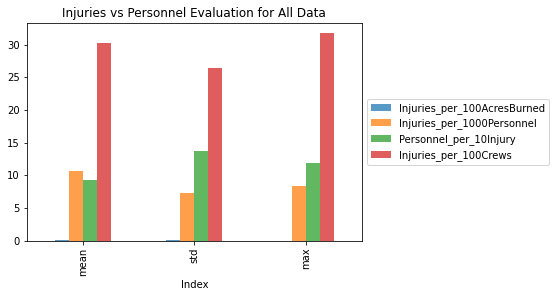

In [246]:
df_r.plot(kind="bar", stacked=False, rot=90, alpha=0.75)
plt.title("Injuries vs Personnel Evaluation for All Data")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Index")
plt.show()

In [247]:
# Remove additional columns, for clarity

df_r1 = df.drop(["AcresBurned", "Injuries", "Engines","CrewsInvolved", "PersonnelInvolved",
             "StructuresDamaged", "StructuresDestroyed", "Injuries_per_100AcresBurned",
             "Injuries_per_1000Personnel", "Personnel_per_10Injury",
               "Injuries_per_100Crews", "StructuresThreatened"], axis =1)
df_r1 = df_r1.set_index("index")

df_r1.round(2)

,StructuresDestroyed_per_Personnel,StructuresDamaged_per_Personnel,Engines_per_1000AcresBurned
index,,,
mean,0.84,0.21,4.92
std,2.99,0.30,1.47
max,6.07,0.25,0.62


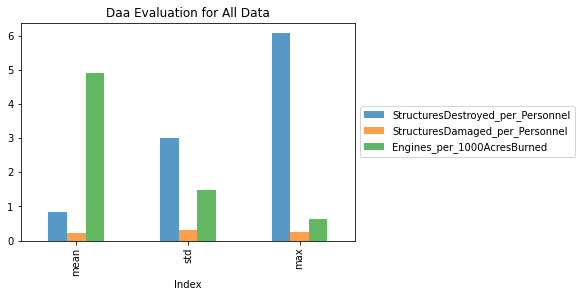

In [248]:
df_r1.plot(kind="bar", stacked=False, rot=90, alpha=0.75)
plt.title("Daa Evaluation for All Data")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Index")
plt.show()

In [249]:
# 2. ANALYSIS OF DATA BY COUNTY

# 2.1 Sum values by County

df1

df1 = df1.groupby(["Counties"]).sum()

df1.head(2)

,AcresBurned,Injuries,Fatalities,AirTankers,Dozers,Engines,Helicopters,WaterTenders,CrewsInvolved,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened
Counties,,,,,,,,,,,,,,
Alameda,6387.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,18.0,0.0,1.0,0.0,0.0
Amador,6265.0,2.0,0.0,4.0,7.0,57.0,3.0,16.0,13.0,190.0,0.0,68.0,0.0,0.0


In [250]:
# 2.2 For analysis by County: add columns showing parameters normalized by acres burned, personnel involved and crews involved.
#Remove columns not required

df2 = df1.groupby(["Counties"]).sum()

df2['100AcresBurned'] = df1['AcresBurned'].div(10**2)

df2['Injuries_per_100AcresBurned'] = df1['Injuries']/df1['AcresBurned']*100

df2['Injuries_per_AcresBurned'] = df1['Injuries']/df1['AcresBurned']

df2['Injuries_per_100Personnel'] = df1['Injuries']/df1['PersonnelInvolved']*100

df2['StructuresDestroyed_per_PersonnelInvolved'] = df1['StructuresDestroyed']/df1['PersonnelInvolved']

df2['StructuresDamaged_per_PersonnelInvolved'] = df1['StructuresDamaged']/df1['PersonnelInvolved']

df2['Personnel_per_10Injury'] = df1['PersonnelInvolved']/df1['Injuries']/10

df2['Engines_per_1000AcresBurned'] = df1['Engines']/df1['AcresBurned']*1000

df2['Injuries_per_100Crews'] = df1['Injuries']/df1['CrewsInvolved']*100

df2 = df2.sort_values("AcresBurned", ascending = 0).reset_index(drop = False)

df2 = df2.drop(["Fatalities","AirTankers","Dozers", "Helicopters", "WaterTenders", "StructuresEvacuated", "Engines_per_1000AcresBurned"], axis =1)


df2.head()


,Counties,AcresBurned,Injuries,Engines,CrewsInvolved,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresThreatened,100AcresBurned,Injuries_per_100AcresBurned,Injuries_per_AcresBurned,Injuries_per_100Personnel,StructuresDestroyed_per_PersonnelInvolved,StructuresDamaged_per_PersonnelInvolved,Personnel_per_10Injury,Injuries_per_100Crews
0,Lake,582784.0,8.0,379.0,98.0,4407.0,44.0,901.0,2075.0,5827.84,0.001373,0.000014,0.181529,0.204447,0.009984,55.087500,8.163265
1,Mendocino,512702.0,29.0,275.0,76.0,3485.0,44.0,838.0,2075.0,5127.02,0.005656,0.000057,0.832138,0.240459,0.012626,12.017241,38.157895
2,Trinity,481048.0,2.0,14.0,87.0,761.0,61.0,1657.0,0.0,4810.48,0.000416,0.000004,0.262812,2.177398,0.080158,38.050000,2.298851
3,Colusa,459316.0,3.0,273.0,63.0,3241.0,0.0,281.0,2075.0,4593.16,0.000653,0.000007,0.092564,0.086702,0.000000,108.033333,4.761905
4,Shasta,448517.0,55.0,203.0,103.0,2768.0,79.0,1940.0,0.0,4485.17,0.012263,0.000123,1.986994,0.700867,0.028540,5.032727,53.398058


In [251]:
# Remove columns, for clarity
df2 = df2.drop([
              "AcresBurned", "100AcresBurned",
                "Injuries", "Engines","CrewsInvolved", "PersonnelInvolved",
              "StructuresDamaged", "StructuresDestroyed", 
                "Injuries_per_100AcresBurned", "Injuries_per_100Personnel", "Personnel_per_10Injury",
                "Injuries_per_100Crews", "StructuresThreatened",
                ], axis =1)
# df2 = df2.set_index("Counties")
df2.head(3).round(2)

,Counties,Injuries_per_AcresBurned,StructuresDestroyed_per_PersonnelInvolved,StructuresDamaged_per_PersonnelInvolved
0,Lake,0.0,0.20,0.01
1,Mendocino,0.0,0.24,0.01
2,Trinity,0.0,2.18,0.08


In [252]:
counties_list = df2["Counties"].to_list()
print(counties_list)


['Lake', 'Mendocino', 'Trinity', 'Colusa', 'Shasta', 'Ventura', 'Glenn', 'Siskiyou', 'Santa Barbara', 'Tuolumne', 'Napa', 'Mariposa', 'Fresno', 'Sonoma', 'Los Angeles', 'Butte', 'Modoc', 'Monterey', 'Lassen', 'Kern', 'El Dorado', 'Yolo', 'San Luis Obispo', 'Riverside', 'Tulare', 'San Bernardino', 'San Diego', 'Plumas', 'Solano', 'Kings', 'Tehama', 'Madera', 'Del Norte', 'Placer', 'Orange', 'Mono', 'Inyo', 'Humboldt', 'Merced', 'San Joaquin', 'Yuba', 'Stanislaus', 'Santa Clara', 'Contra Costa', 'Alameda', 'Amador', 'San Benito', 'Nevada', 'Sutter', 'Calaveras', 'Sacramento', 'Mexico', 'State of Oregon', 'State of Nevada', 'Sierra', 'Santa Cruz', 'Marin', 'San Mateo']


In [262]:
df2_copy = df2
df3 = df2_copy.set_index("Counties")
df3.head()



,Injuries_per_AcresBurned,StructuresDestroyed_per_PersonnelInvolved,StructuresDamaged_per_PersonnelInvolved
Counties,,,
Lake,0.000014,0.204447,0.009984
Mendocino,0.000057,0.240459,0.012626
Trinity,0.000004,2.177398,0.080158
Colusa,0.000007,0.086702,0.000000
Shasta,0.000123,0.700867,0.028540


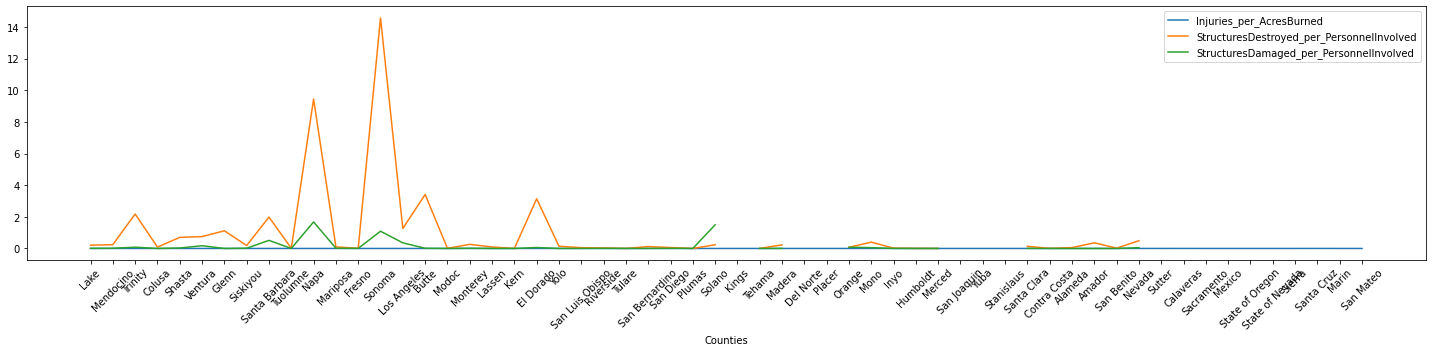

In [260]:
# TO BE MODIFIED _____________

df3.plot(kind = "line", figsize=(20,5))
plt.xticks(np.arange(len(counties_list)), counties_list, rotation=45)
plt.tight_layout()
plt.show()

In [255]:
# SCRAP TO BE DELETED (CODE MAY TURN OUT TO BE USEFUL AT SOME POINT)--------------------------------------------------------------------------------------------------------

In [256]:
# df5 = df5.sort_values([("AcresBurned", "mean")], ascending = False).round(2)

# df1 = df[["UniqueId", "Counties", "AcresBurned", 
#           "Injuries","StructuresDestroyed", "Injuries_per_AcresBurned",
# #          "Injuries_per_100AcresBurned" ]
#         ]
# df2 = pd.concat([df1,PersonnelInvolved], axis = 1)

# df3 = df3.drop(axis=1,columns=["25%","50%", "75%"], level = 1)
# DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

# df1 = df1.loc[
#                 (df1["Injuries_per_MilAcresBurned"] >0) 
#                & (df1["MilAcresBurned"] > 0.001)
#                 & (df1["Personnel_per_MilAcresBurned"] > 0)
#                 & (df1["Personnel_per_Injury"] > 0)
#              ]


# stats_tot_mean = df.groupby(["Counties"]).mean()
# # stats_tot_mean = stats_tot_mean.sort_values("AcresBurned", ascending = 0).reset_index().round(0)

# # Generate a summary statistics table of mean, median, variance, standard deviation, 
# # and SEM of the tumor volume for each regimen
# ac_burn_mean = major.groupby('Counties')['AcresBurned'].mean()
# ac_burn_median = major.groupby('Counties')['AcresBurned'].median()
# ac_burn_variance = major.groupby('Counties')['AcresBurned'].var()
# ac_burn_standard_dv = major.groupby('Counties')['AcresBurned'].std()
# ac_burn_sem = major.groupby('Counties')['AcresBurned'].sem()

# ac_burn_summary_stat = pd.DataFrame({"Acres Burned Mean": ac_burn_mean, 
#                                       "Acres Burned Median": ac_burn_median, 
#                                       "Acres Burned Variance": ac_burn_variance, 
#                                       "Acres Burned Standard Deviation": ac_burn_standard_dv,
#                                       "Acres Burned SEM": ac_burn_sem}
#                                       )

# clean = fires_by_county[(fires_by_county['ArchiveYear'] >= 2020) & (fires_by_county['ArchiveYear'] <= 2010)].index

# fires_by_county.drop(clean, inplace=True)
# fires_by_county.head()


# pyre1_df = pyre1_df.loc[pyre1_df["MajorIncident"]==True]
# pyre1_df.head(1)
# pyre1_df["MajorIncident"].count()